In [2]:
import sys
sys.path.append('../src/')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from LEC import Lec

from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.datasets import load_boston
from sklearn.datasets import make_blobs

from utils import unlabel

# X = pd.DataFrame(load_wine()['data'], columns=load_wine()['feature_names'])

# y = load_wine()['target']
# y_unl = unlabel(y, frac= 0.95)

# c_ens = Lec(y_r = y_unl, Q=10, Di=X.copy())
# df1 = c_ens.fit_transform().mode(axis=1)
# df2 = c_ens.fit_transform().mode(axis=1)

In [3]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)
y_unl = unlabel(y, frac= 0.95)

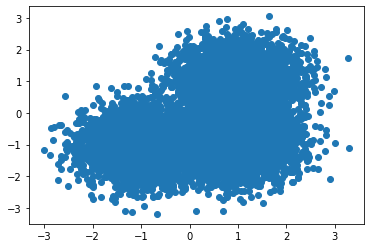

In [4]:
plt.scatter(X[:,0],X[:,1])

In [6]:
K= 10
Q= 10
Di= X
y_r=y_unl.copy()

c_ens = Lec(y_r = y_unl, Q=10, Di=X.copy())

results = []
for _ in range(K):
    predictions = c_ens.unsup_prediction(Q = Q,
                                         Di =Di,
                                         y_r = y_r.copy())
    results.append(predictions)
    
results = pd.DataFrame(results).T
results

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,2,0,0,0,0,0
2,2,2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2,2
4,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
9995,1,1,1,1,1,1,1,1,1,1
9996,1,1,1,1,1,1,1,1,1,1
9997,0,0,2,0,2,0,0,0,0,0
9998,0,0,0,0,2,0,0,0,0,0


In [12]:
c_ens = Lec(y_r = y_unl, Q=10, Di=X)
c_ens.fit_transform()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,2,2,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2,2
4,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
9995,1,1,1,1,1,1,1,1,1,1
9996,1,1,1,1,1,1,1,1,1,1
9997,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0
